In [1]:
# import jtplot module in notebook
from jupyterthemes import jtplot
jtplot.style()

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
        tgz_path = os.path.join(housing_path, "housing.tgz")
        urllib.request.urlretrieve(housing_url, tgz_path)
        housing_tgz = tarfile.open(tgz_path)
        housing_tgz.extractall(path=housing_path)
        housing_tgz.close()
    print("done")

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
fetch_housing_data(HOUSING_URL)

done


In [5]:
housing_data = load_housing_data()
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing_data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114c4aa90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115043e48>]], dtype=object)

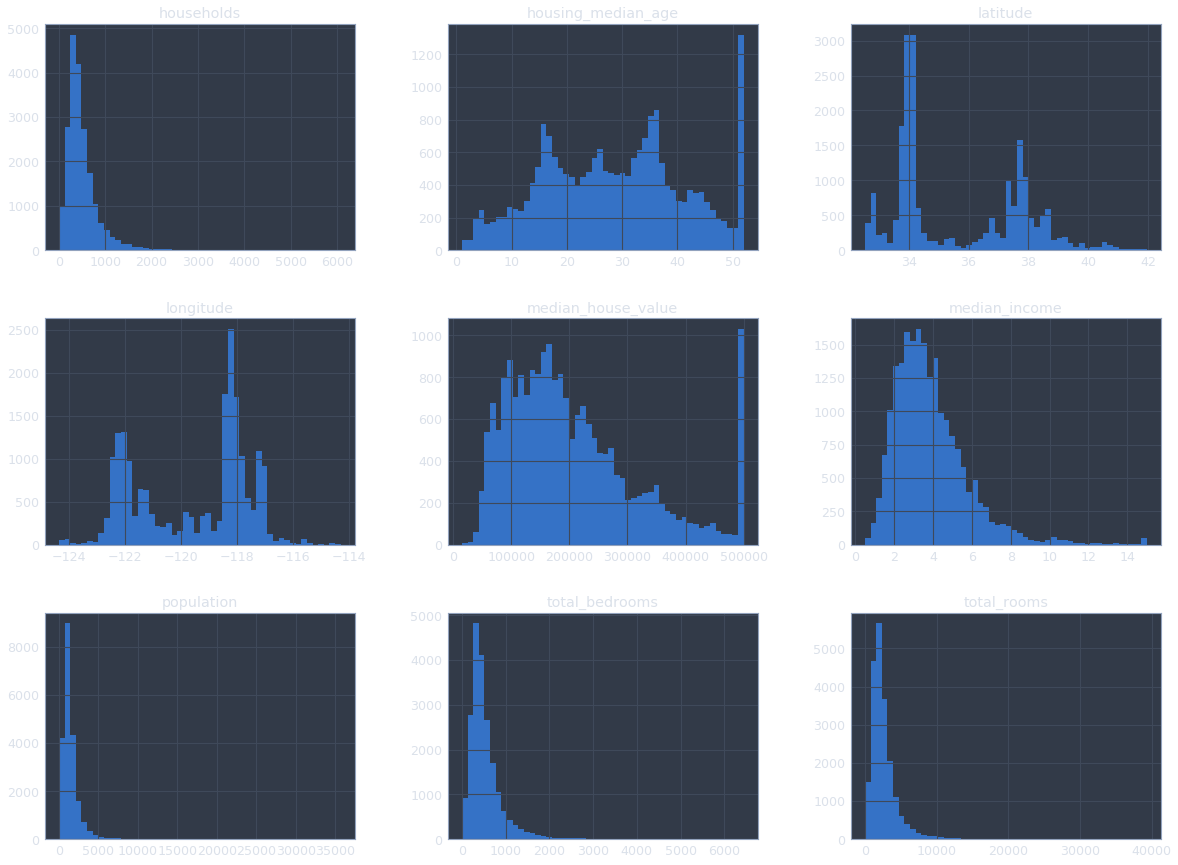

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

housing_data.hist(bins=50, figsize=(20,15))

In [10]:
import numpy as np
import hashlib
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing_data.reset_index() # adds an `index` column

In [11]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [39]:
import hashlib
help(hashlib.md5(np.int64(34.0)).digest)

Help on built-in function digest:

digest(...) method of _hashlib.HASH instance
    Return the digest value as a string of binary data.



In [40]:
help(np.int64)

Help on class int64 in module numpy:

class int64(signedinteger)
 |  64-bit integer. Character code 'l'. Python int compatible.
 |  
 |  Method resolution order:
 |      int64
 |      signedinteger
 |      integer
 |      number
 |      generic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __and__(self, value, /)
 |      Return self&value.
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __divmod__(self, value, /)
 |      Return divmod(self, value).
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __float__(self, /)
 |      float(self)
 |  
 |  __floordiv__(self, value, /)
 |      Return self//value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __index__(self, /)
 |      Return self converted to an integer,

In [41]:
help(hashlib.md5)

Help on built-in function openssl_md5 in module _hashlib:

openssl_md5(...)
    Returns a md5 hash object; optionally initialized with a string



In [19]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

train_set.head()
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND,2.0
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND,2.0
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY,3.0
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN,4.0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN,3.0


In [37]:
housing_data["income_cat"] = np.ceil(housing_data["median_income"] / 1.5)
housing_data["income_cat"].where(housing_data["income_cat"] < 5, 5.0, inplace=True)
(housing_data["median_income"] / 1.5).describe()
help(housing_data["median_income"].where)

Help on method where in module pandas.core.generic:

where(cond, other=nan, inplace=False, axis=None, level=None, try_cast=False, raise_on_error=True) method of pandas.core.series.Series instance
    Return an object of same shape as self and whose corresponding
    entries are from self where cond is True and otherwise are from
    other.
    
    Parameters
    ----------
    cond : boolean NDFrame, array-like, or callable
        If cond is callable, it is computed on the NDFrame and
        should return boolean NDFrame or array. The callable must
        not change input NDFrame (though pandas doesn't check it).
    
        .. versionadded:: 0.18.1
            A callable can be used as cond.
    
    other : scalar, NDFrame, or callable
        If other is callable, it is computed on the NDFrame and
        should return scalar or NDFrame. The callable must not
        change input NDFrame (though pandas doesn't check it).
    
        .. versionadded:: 0.18.1
            A calla

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]
    
help(housing_data["income_cat"].value_counts)

Help on method value_counts in module pandas.core.base:

value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True) method of pandas.core.series.Series instance
    Returns object containing counts of unique values.
    
    The resulting object will be in descending order so that the
    first element is the most frequently-occurring element.
    Excludes NA values by default.
    
    Parameters
    ----------
    normalize : boolean, default False
        If True then the object returned will contain the relative
        frequencies of the unique values.
    sort : boolean, default True
        Sort by values
    ascending : boolean, default False
        Sort in ascending order
    bins : integer, optional
        Rather than count values, group them into half-open bins,
        a convenience for pd.cut, only works with numeric data
    dropna : boolean, default True
        Don't include counts of NaN.
    
    Returns
    -------
    counts : Series



In [33]:
housing_data["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64